In [2]:
import dbow
import cv2
import numpy as np
from glob import glob

In [3]:
detector = cv2.ORB_create(500)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
images_path = "../images/"
paths = sorted(glob(images_path + "*.png"))
images = []

for path in paths:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
    images.append(image)

print("Images_Loaded: ", len(images))
n_clusters = 20
depth = 3
vocab = dbow.Vocabulary(images, n_clusters, depth)
vocab.save("vocab.pkl")


Images_Loaded:  56


In [ ]:

vocab.load("vocab.pkl")
bows = []
for image in images:
    keypoints, descriptors = detector.detectAndCompute(image, None)
    descriptors = [dbow.ORB.from_cv_descriptor(desc) for desc in descriptors]
    bows.append(vocab.descs_to_bow(descriptors))


for j in range(len(bows)):
    print("Distance:", bows[1].score(bows[j]))
print()

Distance: 0.4482778147008154
Distance: 1.0
Distance: 0.4083890915269568
Distance: 0.3946435902554267
Distance: 0.4059317080731336
Distance: 0.4222244277642526
Distance: 0.42104174782683423
Distance: 0.42383040743336486
Distance: 0.4374313395699386
Distance: 0.42043057124528904
Distance: 0.41633579370754326
Distance: 0.40231166215418657
Distance: 0.43048033060737123
Distance: 0.43171720768022026
Distance: 0.40796566757599084
Distance: 0.4309346731455862
Distance: 0.40949821544668485
Distance: 0.3906791230823672
Distance: 0.3894266464513688
Distance: 0.4200241521884984
Distance: 0.42136625440895603
Distance: 0.43075829615676753
Distance: 0.3879123730680888
Distance: 0.41134011681805105
Distance: 0.41962435439900214
Distance: 0.4166413122085788
Distance: 0.41919693949507464
Distance: 0.397349269422656
Distance: 0.44337692886366853
Distance: 0.42730004985209424
Distance: 0.4342655891504499
Distance: 0.39902696379566693
Distance: 0.3969431024983028
Distance: 0.42341308473876305
Distance: 0.

In [5]:
images_path = "/media/storage/lost+found/projects/og_odometry_python/image_0/"
paths = sorted(glob(images_path + "*.png"))
images = []
bows = []

vocab = dbow.Vocabulary.load("vocab.pkl")

for path in paths:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    images.append(image)

for image in images:
    keypoints, descriptors = detector.detectAndCompute(image, None)
    descriptors = [dbow.ORB.from_cv_descriptor(desc) for desc in descriptors]
    bows.append(vocab.descs_to_bow(descriptors))



In [10]:
distances = []
for j in range(len(bows)):
    distances.append(bows[890].score(bows[j]))

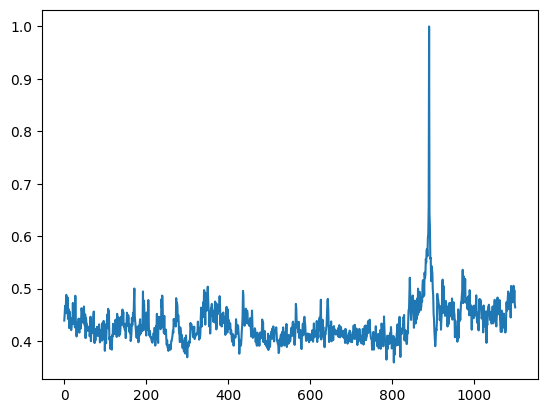

In [11]:
import matplotlib.pyplot as plt
plt.plot(distances)
plt.show()

In [9]:
max_val = 0
valid_index = 10000000
for i in range(len(distances)):
    if distances[i] > 0.53:
        if abs(i - 1060) < 10:
            continue
        if distances[i] > max_val:
            max_val = distances[i]
            valid_index = i

if valid_index != 10000000:
    print("Loop Closure Detected!")
    print("Valid_Index:", valid_index)
    print("Distance:", max_val)

Loop Closure Detected!
Valid_Index: 8
Distance: 0.5414755809865701
